In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import shutil, os
import networkx as nx
#import sys                           ## For checking the current version of python etc 
#import os                            ## For checking the current directory
import pandas as pd                  ## For loading the daset
import matplotlib.pyplot as plt      ## For create charts e.g. histogram
import seaborn as sns

In [34]:
cases_by_country = pd.read_csv("covid_19_cmplt_22_Apr.csv", encoding="UTF-8") 
crime_ind_dat = pd.read_csv("Crime_index_cntry_2020.csv",  encoding="UTF-8") 
qual_life_dat = pd.read_csv("Quality_life_index_cntry_2020.csv",  encoding="UTF-8") 
Popln_dnsty_dat = pd.read_csv("Popln_dnsty_cntry.csv", encoding="UTF-8") 
hosp_beds_dat = pd.read_csv("hospital_beds.csv", encoding="UTF-8", skiprows=[0,1,2,3]) 
hlth_care_ind = pd.read_csv("Health_care_index_cntry_2020.csv", encoding="UTF-8") 
#air_disease_dat = pd.read_csv("data_air_diseases.csv", encoding="UTF-8") 
covid_by_case_dat = pd.read_csv("COVID19_byc_case_small.csv", encoding="UTF-8",skiprows = [0],\
                                usecols = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],\
                               names = ['id', 'case_in_country', 'reporting_date', 'summary', 'location',\
                                         'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',\
                                         'hosp_visit_date', 'exposure_start', 'exposure_end', 'visiting Wuhan',\
                                         'from_Wuhan', 'death', 'recovered', 'symptom', 'source', 'link']) 
cost_living_ind = pd.read_csv("Cost_living_index_country_2020.csv", encoding="UTF-8") 
cntry_age_str = pd.read_csv("Coutries_age_str.csv", encoding="UTF-8") 
shots_sched_dat = pd.read_csv("schedule_shots.csv", encoding="UTF-8") 
vaccine_dat = pd.read_csv("vaccine_cloud.csv", encoding="UTF-8") 

pollution_ind = pd.read_table("pollution_index_2019.rtf", sep = "\t",encoding="UTF-8", skiprows = [0,1])


#('tweets.csv', header=True, inferSchema=True, multiLine=True, encoding="UTF-8", sep=',', quote='"',escape='"')





In [35]:
print("cases_by_country")
print(cases_by_country.head(5))
print("")

print("Country age distribution")
print(cntry_age_str.head(5))
print("")

print("by case data")
print(covid_by_case_dat.head(5))
print("")

print("quality of life")
print(qual_life_dat.head(5))
print("")

print("population density")
print(Popln_dnsty_dat.head(5))
print("")

print("hospital beds")
print(hosp_beds_dat.head(5))
print("")


print("Shots schedule")
print(shots_sched_dat.head(5))
print("")


covid_by_case_dat.head(5)


cases_by_country
  Province/State Country/Region   Lat  Long       Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0  65.0  1/22/2020          0       0   
1            NaN    Afghanistan  33.0  65.0  1/23/2020          0       0   
2            NaN    Afghanistan  33.0  65.0  1/24/2020          0       0   
3            NaN    Afghanistan  33.0  65.0  1/25/2020          0       0   
4            NaN    Afghanistan  33.0  65.0  1/26/2020          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0  

Country age distribution
    Country Age 0 to 14 Years Age 15 to 64 Years Age above 65 Years
0     Japan            12.90%             60.10%                27%
1     Italy            13.50%             63.50%                23%
2  Portugal            13.60%             64.90%                22%
3   Germany            13.10%             65.50%                22%
4   Finland            16.40%             62.40%                

,id,case_in_country,reporting_date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from_Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


# Age Pyramids

In [36]:
temp = covid_by_case_dat
temp['age_bins'] = pd.cut(x=covid_by_case_dat['age'], bins=[0, 10, 15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100])
pyramid_dat = temp.groupby(["gender", "age_bins"], as_index=False )["id"].count()
pyramid_dat.head(35)

male_dat = pyramid_dat[(pyramid_dat['gender'] == "male")]
male_dat.columns = ['gender', 'age', 'male']
female_dat = pyramid_dat[(pyramid_dat['gender'] == "female")]
female_dat.columns = ['gender', 'age', 'female']
female_dat['female']= -1*female_dat['female']
male_dat.head(5)
prym_dat = male_dat.merge(female_dat, left_on='age', right_on='age')
prym_dat.drop(["gender_x","gender_y" ], axis=1)
print()

C:\Users\kkbbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


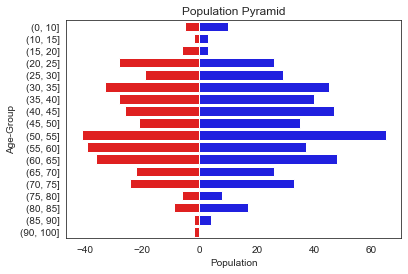

In [38]:

sns.set_style("white")
#sns.set_color_codes("pastel")

bar_plot = sns.barplot(x="female",y="age", color="red", label="Women",data = prym_dat)
bar_plot = sns.barplot(x="male",y="age", color="blue", label="Men",data = prym_dat)
bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid");


In [ ]:
def country_age():
    

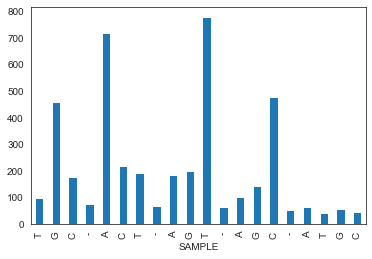

In [39]:
d = {'columns': ['T', 'G', 'C', '-', 'A', 'C', 'T', '-', 'A', 'G', 'T', 
                 '-', 'A', 'G', 'C', '-', 'A', 'T', 'G', 'C'],
     'data': [[97, 457, 178, 75, 718, 217, 193, 69, 184, 198,
               777, 65, 100, 143, 477, 54, 63, 43, 55, 47]],
     'index': [1]}
df = pd.DataFrame(d['data'], columns=d['columns'], index=d['index'])
df.columns.names = ['SAMPLE']
df
row = df.iloc[0]
row
row.plot(kind='bar')
plt.show()

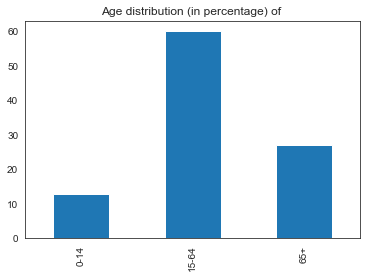

In [40]:
cntry_age_str.head(5)
a = cntry_age_str[cntry_age_str['Country'] == 'Japan']
a = a.drop(("Country"), axis = 1)
a.columns = ["0-14", "15-64", "65+"]

b = a.iloc[0]
b = b.replace(to_replace="%",  value="", regex=True)
b = pd.to_numeric(b)
b.plot(kind='bar', title = "Age distribution (in percentage) of ")
plt.show()

# Feature selection
### Classification


### Data Preparation

#### Population and indexes

In [357]:
Popln_dnsty_dat.columns = ['rank','Country', 'Area/km2', 'Area/mi2', 'popln', 'density', 'dens/mil', 'date', 'soruce']
temp = pd.merge(qual_life_dat,Popln_dnsty_dat[["Country","popln", "density" ]], on ="Country", how= 'left' )

temp = temp.dropna()
temp.columns = ['Cname', 'Quality_Life_Index', 'Purchasing_Power_Index','Safety_Index', 'Health_Care_Index',\
                'Cost_Living_Index','Property_Price_Income_Ratio', 'Traffic_Commute_Time_Index',\
                'Pollution_Index', 'Climate_Index', 'popln', 'density']



#### Cases data

In [358]:
cases_by_country['Dates'] = pd.to_datetime(cases_by_country['Date'], format="%m/%d/%Y")
# Aggregating the data for provinces.
cases_country = cases_by_country.groupby(["Country/Region","Dates"]  ).\
agg(Confirmed=('Confirmed', sum),Deaths=('Deaths', sum),Recovered=('Recovered', sum)).reset_index()
# getting the most recent data
cases_country= cases_country.groupby(["Country/Region"] ).\
agg(Dates = ("Dates", max) ,Confirmed=('Confirmed', max),Deaths=('Deaths', max),Recovered=('Recovered', max)).reset_index()

#changing Country names to match in the data
cases_country=cases_country.replace(to_replace="Czechia",  value="Czech Republic", regex=True)
cases_country=cases_country.replace( to_replace="US", value="United States", regex=True)
cases_country= cases_country.replace( to_replace="Taiwan\*", value="Taiwan", regex=True)

#changing column name to match temp's column name
cases_country.columns =['Cname', 'Dates', 'Confirmed', 'Deaths', 'Recovered']

#### merging the two data sets

In [440]:
two_dat = pd.merge(temp,cases_country[["Cname","Confirmed","Deaths" ]], on ="Cname", how= 'left' )
two_dat = two_dat.dropna()

#### Preping the vaccine file

In [441]:
A = vaccine_dat.drop(['Comment', 'Entire_Part',"Schedule"], axis=1)

#dropping any NA value rows
A.dropna(inplace = True)

#getting vaccine names from all columns
A["Vaccine_Desc"] = A["Vaccine_Desc"].str.lower()
A["vaccine"]=A["Vaccine_Desc"].str.split(" ", expand = False) 

test = A[["Cname", "vaccine"]]
test2 = test.groupby('Cname').agg({'vaccine': 'sum'}, as_index=False).reset_index()
pd.set_option('display.max_colwidth', -1)

test2['vaccine'] = test2['vaccine'].apply(lambda x: list(set(x)))
vaccine_one_hot= test2['vaccine'].str.join('|').str.get_dummies()
#vaccine_one_hot.head(10)
Cname = test2["Cname"].to_frame()
# Merge two Dataframes on index of both the dataframes
vaccine_all = Cname.merge(vaccine_one_hot, left_index=True, right_index=True)

# matching the key for vaccine and  data sets
vaccine_all = vaccine_all.replace(to_replace="Iran \(Islamic Republic of\)",  value="Iran", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Netherlands \(the\)",  value="Netherlands", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Philippines \(the\)",  value="Philippines", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Russian Federation \(the\)",  value="Russia", regex=True)
vaccine_all = vaccine_all.replace(to_replace="United Arab Emirates \(the\)",  value="United Arab Emirates", regex=True)
vaccine_all = vaccine_all.replace(to_replace="United Kingdom of Great Britain and Northern Ireland \(the\)",  value="United Kingdom", regex=True)
vaccine_all = vaccine_all.replace(to_replace="United States of America \(the\)",  value="United States", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Viet Nam",  value="Vietnam", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Republic of Korea \(the\)",  value="South Korea", regex=True)

# For vaccine only part
vaccine_all = vaccine_all.replace(to_replace="Bahamas \(the\)",  value="Bahamas", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Bolivia \(Plurinational State of\)",  value="Bolivia", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Brunei Darussalam",  value="Brunei", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Myanmar",  value="Burma", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Central African Republic \(the\)",  value="Central African Republic", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Democratic Republic of the Congo \(the\)",  value="Congo Kinshasa", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Congo \(the\)",  value="Congo Brazzaville", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Dominican Republic \(the\)",  value="Dominican Republic", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Republic of Moldova \(the\)",  value="Moldova", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Niger \(the\)",  value="Niger", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Sudan \(the\)",  value="Sudan", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Syrian Arab Republic \(the\)",  value="Syria", regex=True)
vaccine_all = vaccine_all.replace(to_replace="United Republic of Tanzania",  value="Tanzania", regex=True)
vaccine_all = vaccine_all.replace(to_replace="Venezuela \(Bolivarian Republic of\)",  value="Venezuela", regex=True)


#merging two data sets with vaccine data set
final2 = pd.merge(two_dat,vaccine_all, on ="Cname", how= 'left' )
final2 = final2.dropna()

In [442]:
#final2 = pd.merge(final,vaccine2[["Cname","vaccine"]], on ="Cname", how= 'left' )
mortality = final2["Deaths"]/final2["Confirmed"]
mortality= mortality.to_frame()
mortality.columns = ["target"]

final2["popln"] = final2["popln"].str.replace(',', '')
final2["popln"] = pd.to_numeric(final2["popln"])
final2["density"] = final2["density"].str.replace(',', '')
final2["density"] = pd.to_numeric(final2["density"])



death_density = final2["Deaths"]/final2["density"]
death_density= death_density.to_frame()
death_density.columns = ["target"]

death_popln = 1000*final2["Deaths"]/final2["popln"]
death_popln = death_popln.to_frame()
death_popln.columns = ["target"]

deaths = final2["Deaths"]
deaths= deaths.to_frame()
deaths.columns = ["target"]

final3 = final2.drop(['Cname','Deaths', 'Confirmed',"density", "popln"], axis=1)

feature1 = mortality.merge(final3, left_index=True, right_index=True)
feature2 = death_density.merge(final3, left_index=True, right_index=True)
feature3 = death_popln.merge(final3, left_index=True, right_index=True)
feature4 = deaths.merge(final3, left_index=True, right_index=True)

## Random Forest Feature Selection

In [443]:
#python -m site
import sklearn as sk
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [444]:
c = [0,3,4,6, 7, 9]
d = range(10, 76)


c.extend(list(d))



In [445]:
def feature_selector(data,thresh, index  = 0):
    if index != 0:
        X = data.iloc[:, index]
    else: 
        X = data.iloc[:,1:]
    Y = data.iloc[:, 0]
    X_train,X_test,y_train,y_test = sk.model_selection.train_test_split(X, Y,test_size=0.3, random_state=786)
    sel = SelectFromModel(RandomForestRegressor(n_estimators = 500), threshold=thresh)
    sel.fit(X_train, y_train)
    selected_feat= X_train.columns[(sel.get_support())]
    return list(selected_feat)

In [446]:
c = [3,4,6, 7, 9]
d = range(10, 76)


c.extend(list(d))



In [447]:
qual_index = [3,4,6, 7, 9]
vaccine_only = range(10, 66)
c = [3,4,6, 7, 9]

c.extend(list(vaccine_only))
all_var = c


In [448]:
print(feature_selector(feature1, "3*mean",all_var))
print(feature_selector(feature1, "mean", qual_index))
#print(feature_selector(feature1, "3*mean", vaccine_only))

['Safety_Index', 'Health_Care_Index', 'Traffic_Commute_Time_Index', 'Climate_Index', 'meningococcal_c']
['Safety_Index', 'Climate_Index']


In [449]:
print(feature_selector(feature2, "3*mean", all_var))
print(feature_selector(feature2, "mean", index_only))


['Safety_Index', 'Health_Care_Index', 'Property_Price_Income_Ratio', 'Climate_Index', 'meningococcal_c']
['Safety_Index', 'Health_Care_Index', 'Property_Price_Income_Ratio']


In [450]:
print(feature_selector(feature3, "3*mean", all_var))
print(feature_selector(feature3, "mean", index_only))
#print(feature_selector(feature3, "3*mean", vaccine_only))

['Health_Care_Index', 'Climate_Index', 'meningococcal_c']
['Safety_Index', 'Health_Care_Index', 'Property_Price_Income_Ratio']


In [451]:
print(feature_selector(feature4, "3*mean", all_var))
print(feature_selector(feature4, "mean", index_only))
#print(feature_selector(feature4, 0.1, vaccine_only))

['Health_Care_Index', 'acwy-135', 'conjugate', 'meningococcal', 'meningococcal_c']
['Safety_Index', 'Health_Care_Index', 'Property_Price_Income_Ratio', 'Climate_Index']


# Vaccine only data

In [452]:
Poln_dat = Popln_dnsty_dat[["Country","popln", "density" ]]
Poln_dat.columns = ["Cname","popln", "density" ]

In [454]:
# Myanmar -> Burma
Poln_dat = Poln_dat.replace(to_replace="Myanmar",  value="Burma", regex=True)
# Cape Verde -> Cabo Verde
Poln_dat = Poln_dat.replace(to_replace="Cape Verde",  value="Cabo Verde", regex=True)
# Democratic Republic of the Congo -> Congo (Kinshasa)
Poln_dat = Poln_dat.replace(to_replace="Democratic Republic of the Congo",  value="Congo Kinshasa", regex=True)
# Republic of the Congo -> Congo (Brazzaville)
Poln_dat = Poln_dat.replace(to_replace="Republic of the Congo",  value="Congo Brazzaville", regex=True)
# Eswatini (Swaziland) -> Eswatini
Poln_dat = Poln_dat.replace(to_replace="Eswatini \(Swaziland\)",  value="Eswatini", regex=True)
# São Tomé and Príncipe -> Sao Tome and Principe
Poln_dat = Poln_dat.replace(to_replace="São Tomé and Príncipe",  value="Sao Tome and Principe", regex=True)
# Uruguay[note 5] -> Uruguay
Poln_dat = Poln_dat.replace(to_replace="Uruguay\[note 5\]",  value="Uruguay", regex=True)
# Palestine-> West Bank and Gaza
Poln_dat = Poln_dat.replace(to_replace="Palestine",  value="West Bank and Gaza", regex=True)


In [455]:


cases_country = cases_country.replace(to_replace="Congo \(Kinshasa\)",  value="Congo Kinshasa", regex=True)
cases_country = cases_country.replace(to_replace="Congo \(Brazzaville\)",  value="Congo Brazzaville", regex=True)


vac_1 = pd.merge(cases_country[["Cname","Confirmed","Deaths" ]], Poln_dat , on ="Cname", how= 'left' )
vaccine_only = pd.merge(vac_1,vaccine_all, on ="Cname", how= 'left' )
vaccine_only.iloc[39, 3:5] = ["8,67,90,567", "37"]
vaccine_only.iloc[38, 3:5] = ["53,99,895", "16"]#congo
vaccine_only[vaccine_only.isna().any(axis=1)].sort_values(by=['Cname'])#["Cname"]
vaccine_only = vaccine_only.dropna()

#vaccine_only[vaccine_only.isna().any(axis=1)].sort_values(by=['Cname'])#
#Poln_dat.sort_values(by=['Cname']).iloc[40:60,0:2]

In [456]:
mortality = vaccine_only["Deaths"]/vaccine_only["Confirmed"]
mortality= mortality.to_frame()
mortality.columns = ["target"]

vaccine_only["popln"] = vaccine_only["popln"].str.replace(',', '')
vaccine_only["popln"] = pd.to_numeric(vaccine_only["popln"])
vaccine_only["density"] = vaccine_only["density"].str.replace(',', '')
vaccine_only["density"] = pd.to_numeric(vaccine_only["density"])



death_density = vaccine_only["Deaths"]/vaccine_only["density"]
death_density= death_density.to_frame()
death_density.columns = ["target"]
death_popln = 1000*vaccine_only["Deaths"]/vaccine_only["popln"]
death_popln = death_popln.to_frame()
death_popln.columns = ["target"]

deaths = vaccine_only["Deaths"]
deaths= deaths.to_frame()
deaths.columns = ["target"]

vacc_dat = vaccine_only.drop(['Cname','Deaths', 'Confirmed',"density", "popln"], axis=1)


In [457]:
feat1 = mortality.merge(vacc_dat, left_index=True, right_index=True)
feat2 = death_density.merge(vacc_dat, left_index=True, right_index=True)
feat3 = death_popln.merge(vacc_dat, left_index=True, right_index=True)
feat4 = deaths.merge(vacc_dat, left_index=True, right_index=True)

In [458]:
print("Mortality")
print(feature_selector(feat1, "2*mean"))
print("\n")
print("Death by population density")
print(feature_selector(feat2, "2*mean"))
print("\n")
print("Death over countries population")
print(feature_selector(feat3, "2*mean"))
print("\n")
print("Death in numbers")
print(feature_selector(feat4, "2*mean"))

Mortality
['bacille_calmette-guérin', 'childrens', 'hepb_adult', 'hexavalent_diphtheria', 'hpv', 'meningococcal_a', 'meningococcal_c', 'rabies', 'rotavirus', 'rts', 'typhoid', 'vitamina', 'yellow_fever']


Death by population density
['cholera', 'hepa', 'meningococcal_b', 'meningococcal_c', 'polio', 'rabies']


Death over countries population
['cholera', 'hexavalent_diphtheria', 'japanese_encephalitis', 'meningococcal_b', 'meningococcal_c']


Death in numbers
['acwy-135', 'cholera', 'conjugate', 'hepa', 'inactivated_polio', 'meningococcal', 'meningococcal_c', 'rabies']


# Vaccines by country

In [45]:
def vaccine_network(country):
    
    G  = nx.from_pandas_dataframe(df,"hash","at_rate")
    plt.figure(figsize = (9,8))
    nx.draw_networkx(G,with_labels = True,font_size = 10,
                     font_color = "k",
                     font_family  = "DejaVu Sans",
                     node_shape  = "h",node_color = "lightblue",
                     node_size = 1000,linewidths = 10,
                     edge_color = "grey",alpha = .6)
    plt.savefig(word+txt)

In [46]:
vaccine2 = vaccine_dat.drop(['Comment', 'Entire_Part',"Schedule"], axis=1)
vaccine2.dropna(inplace = True) 

# Cleaning Country names 
vaccine2 = vaccine2.replace(to_replace="Iran \(Islamic Republic of\)",  value="Iran", regex=True)
vaccine2 = vaccine2.replace(to_replace="Netherlands \(the\)",  value="Netherlands", regex=True)
vaccine2 = vaccine2.replace(to_replace="Philippines \(the\)",  value="Philippines", regex=True)
vaccine2 = vaccine2.replace(to_replace="Russian Federation \(the\)",  value="Russia", regex=True)
vaccine2 = vaccine2.replace(to_replace="United Arab Emirates \(the\)",  value="United Arab Emirates", regex=True)
vaccine2 = vaccine2.replace(to_replace="United Kingdom of Great Britain and Northern Ireland \(the\)",  value="United Kingdom", regex=True)
vaccine2 = vaccine2.replace(to_replace="United States of America \(the\)",  value="United States", regex=True)
vaccine2 = vaccine2.replace(to_replace="Viet Nam",  value="Vietnam", regex=True)
vaccine2 = vaccine2.replace(to_replace="Republic of Korea \(the\)",  value="South Korea", regex=True)
vaccine2 = vaccine2.replace(to_replace="Bahamas \(the\)",  value="Bahamas", regex=True)
vaccine2 = vaccine2.replace(to_replace="Bolivia \(Plurinational State of\)",  value="Bolivia", regex=True)
vaccine2 = vaccine2.replace(to_replace="Brunei Darussalam",  value="Brunei", regex=True)
vaccine2 = vaccine2.replace(to_replace="Myanmar",  value="Burma", regex=True)
vaccine2 = vaccine2.replace(to_replace="Central African Republic \(the\)",  value="Central African Republic", regex=True)
vaccine2 = vaccine2.replace(to_replace="Democratic Republic of the Congo \(the\)",  value="Congo Kinshasa", regex=True)
vaccine2 = vaccine2.replace(to_replace="Congo \(the\)",  value="Congo Brazzaville", regex=True)
vaccine2 = vaccine2.replace(to_replace="Dominican Republic \(the\)",  value="Dominican Republic", regex=True)
vaccine2 = vaccine2.replace(to_replace="Republic of Moldova \(the\)",  value="Moldova", regex=True)
vaccine2 = vaccine2.replace(to_replace="Niger \(the\)",  value="Niger", regex=True)
vaccine2 = vaccine2.replace(to_replace="Sudan \(the\)",  value="Sudan", regex=True)
vaccine2 = vaccine2.replace(to_replace="Syrian Arab Republic \(the\)",  value="Syria", regex=True)
vaccine2 = vaccine2.replace(to_replace="United Republic of Tanzania",  value="Tanzania", regex=True)
vaccine2 = vaccine2.replace(to_replace="Venezuela \(Bolivarian Republic of\)",  value="Venezuela", regex=True)


vaccine2["vaccine"] =vaccine2["Vaccine_Desc"].str.split(" ", expand = False)
vaccine2  = vaccine2.explode("vaccine")
vaccine2["vaccine"] =vaccine2["vaccine"].str.lower()



In [52]:
def country_vaccine_network(word1, df1 = vaccine2):
    word = word1.lower()
    if word1 in list(df1["Cname"]):
        df = df1[(df1['Cname']==word1)]
    elif word in list(df1["vaccine"]):
        df = df1[(df1['vaccine']==word)]
        
    else:
        return "We could not find your word in our data set"
    G  = nx.from_pandas_edgelist(df,"vaccine","Cname")
    plt.figure(figsize = (13,10))
    nx.draw_networkx(G,with_labels = True,font_size = 10,
                     font_color = "k",
                     font_family  = "DejaVu Sans",
                     node_shape  = "h",node_color = "lightblue",
                     node_size = 1000,linewidths = 10,
                     edge_color = "grey",alpha = .6)

    pass

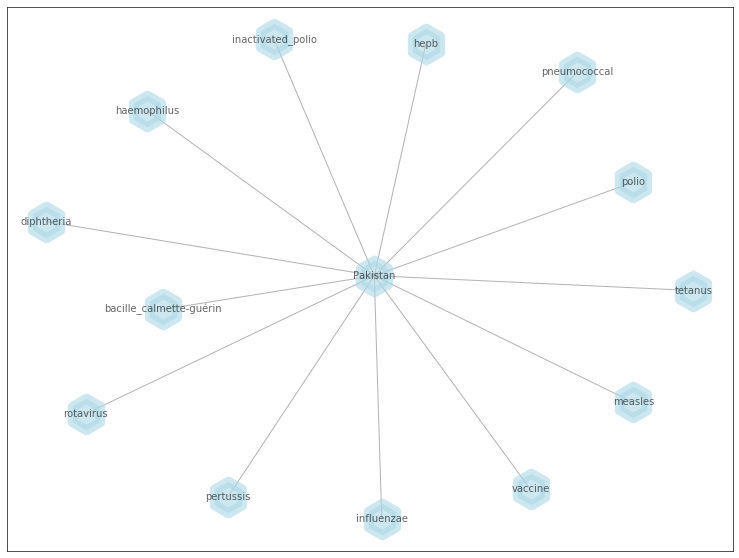

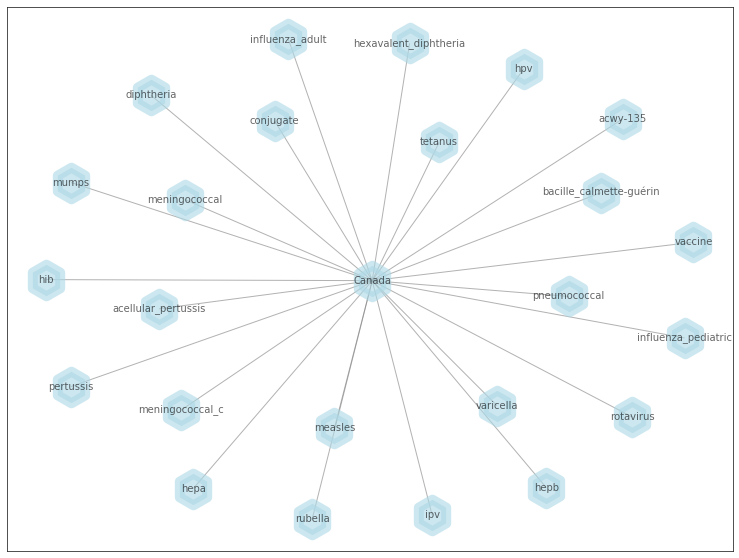

In [54]:
country_vaccine_network('Pakistan')
country_vaccine_network('Canada')


# Difference in vaccinations

In [349]:
import numpy as np

In [350]:
def country_no_vaccine(vaccine, df1 = vaccine2):
    word = vaccine.lower()
    if word in list(vaccine2["vaccine"]):
        df = df1[(df1['vaccine']==word)]
    else: 
        return "We could not find this vaccine in our data set."
    a = list(set(df["Cname"]))
    b = list(set(df1["Cname"]))
    return np.setdiff1d(b,a)
    

In [470]:
country_no_vaccine('polio')#('Meningococcal_C')

array(['Andorra', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Brunei Darussalam', 'Bulgaria', 'Canada', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta',
       'Monaco', 'Netherlands (the)', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Republic of Korea (the)', 'Romania', 'San Marino',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Tuvalu',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Uruguay'], dtype='<U58')

In [477]:
def diff_in_vac(country1, country2, df1 = vaccine2):
    if all(x in list(df1["Cname"]) for x in [country1, country2]):
        dfa = df1[(df1['Cname']==country1)]
        dfb = df1[(df1['Cname']==country2)]
    else:
        return "We could not find you countries in our data set"
    
    a = list(set(dfa["vaccine"]))
    b = list(set(dfb["vaccine"]))    
    print("In "+ country2 +" not in "+ country1)
    print(list(np.setdiff1d(b,a)))
    print("In "+ country1 +" not in "+ country2)
    print(list(np.setdiff1d(a,b)))
    pass

In [482]:
diff_in_vac("Pakistan", "Italy")

In Italy not in Pakistan
['acellular_pertussis', 'acwy-135', 'conjugate', 'hepa', 'hepa_adult', 'hepb_adult', 'hexavalent_diphtheria', 'hib', 'hpv', 'influenza_adult', 'influenza_pediatric', 'ipv', 'meningococcal', 'meningococcal_c', 'mumps', 'rubella', 'varicella']
In Pakistan not in Italy
['haemophilus', 'influenzae']
